In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
import os
import numpy

In [2]:
cascs79 = sorted(os.listdir('/home/braedyn/Documents/causalCascades/7-9/'))
cascs24 = sorted(os.listdir('/home/braedyn/Documents/causalCascades/2-4/'))
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_501_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/2-4/hurstPool_501_5000_100_2_5.npy")

In [5]:
p = 'npc_1000_5000_100_2_5.pkl'

# with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades11_' + p, 'rb') as handle:
#     cc11 = pickle.load(handle)

# with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades12_' + p, 'rb') as handle:
#     cc12 = pickle.load(handle)
    
# with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades21_' + p, 'rb') as handle:
#     cc21 = pickle.load(handle)
    
# with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades22_' + p, 'rb') as handle:
#     cc22 = pickle.load(handle)

In [4]:
def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

In [ ]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(cc22, stockPoolNPC, t0=993, tf=5992)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(cc21, stockPoolNPC, t0=993, tf=5992)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(cc12, stockPoolNPC, t0=993, tf=5992)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(cc11, stockPoolNPC, t0=993, tf=5992)

# NTrans

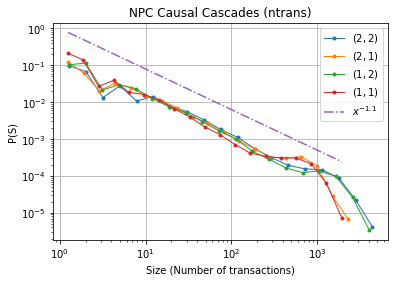

In [6]:
tau = 1.1

hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows22),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows21),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows12),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows11),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans)")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/ntrans_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



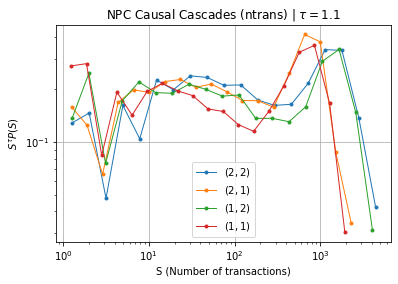

In [7]:
tau = 1.1

hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows21)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows12)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows11)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (ntrans) | $ \tau = $"+str(tau))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel('S (Number of transactions)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/ntrans_scaled_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



# Volume

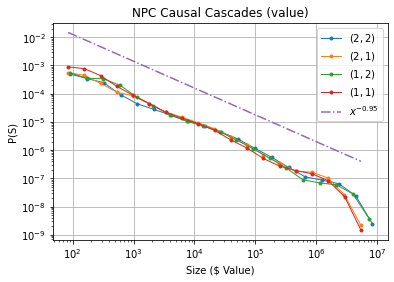

In [8]:
tau =0.95

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes22),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes21),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes12),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes11),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (value)")
plt.ylabel('P(S)')
plt.xlabel('Size ($ Value)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/value_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



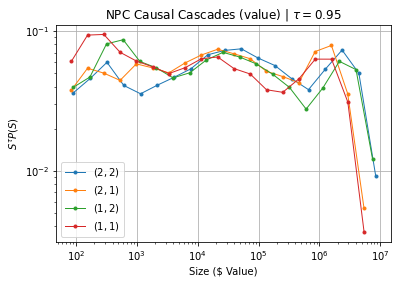

In [9]:
tau =0.95

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes21)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes12)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes11)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

# plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (value) | $ \tau = $"+str(tau))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel('Size ($ Value)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/value_scaled_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



# Duration

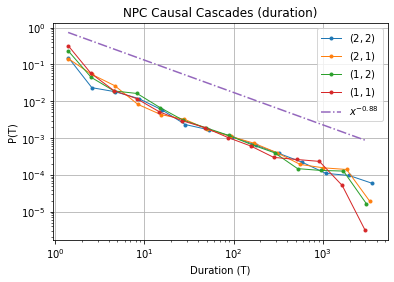

In [10]:
taut = 0.88

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration22),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration21),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration12),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration11),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

plt.plot(mid,numpy.power(mid,-1*taut), '-.', label= "$x^{-"+str(taut)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration)")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/duration_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()

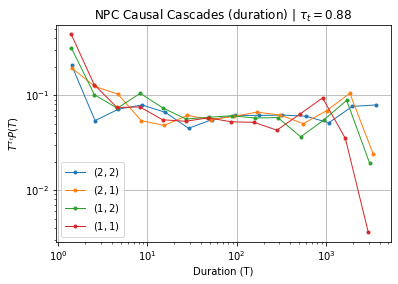

In [11]:
taut = 0.88

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration22)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration21)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration12)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration11)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

# plt.plot(mid,numpy.power(mid,-1*taut), '-.', label= "$x^{-"+str(taut)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (duration) | $\tau_t = $"+str(taut))
plt.ylabel(r'$T^{\tau_t}P(T)$')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/duration_scaled_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()

# compare other 2-5 stock portfolios

In [ ]:
with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades22_npc_200_7200_100_2_5.pkl', 'rb') as handle:
    cc200 = pickle.load(handle)
    
with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades22_npc_100_7200_100_2_5.pkl', 'rb') as handle:
    cc100 = pickle.load(handle)
    
with open('/home/braedyn/Documents/causalCascades/2-4/causalCascades22_npc_501_5000_100_2_5.pkl', 'rb') as handle:
    cc500 = pickle.load(handle)

In [ ]:
npcsizes100, npcnrows100, npcduration100 = cascadeAnalyzerGPU(cc100, stockPoolNPC, t0=993, tf=5992)
npcsizes200, npcnrows200, npcduration200 = cascadeAnalyzerGPU(cc200, stockPoolNPC, t0=993, tf=5992)
npcsizes500, npcnrows500, npcduration500 = cascadeAnalyzerGPU(cc500, stockPoolNPC, t0=993, tf=5992)

## NTrans

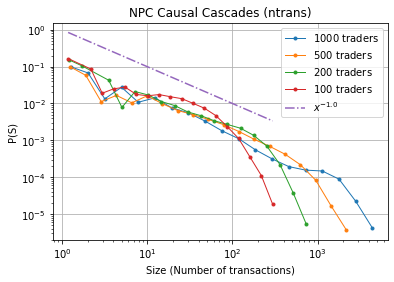

In [16]:
tau = 1.0

hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows22),'o-', linewidth = 1, markersize = 3, label = "$1000$ traders")

hist, bins = np.histogram(npcnrows500, bins=np.logspace(np.log10(min(npcnrows500)),np.log10(max(npcnrows500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows500),'o-', linewidth = 1, markersize = 3, label = "$500$ traders")

hist, bins = np.histogram(npcnrows200, bins=np.logspace(np.log10(min(npcnrows200)),np.log10(max(npcnrows200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows200),'o-', linewidth = 1, markersize = 3, label = "$200$ traders")

hist, bins = np.histogram(npcnrows100, bins=np.logspace(np.log10(min(npcnrows100)),np.log10(max(npcnrows100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows100),'o-', linewidth = 1, markersize = 3, label = "$100$ traders")

plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans)")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/ntrans_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



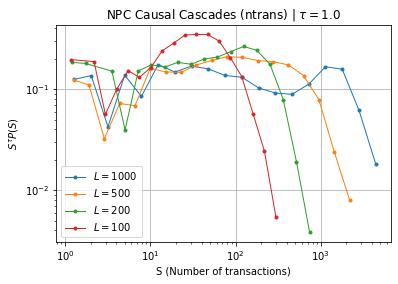

In [17]:
tau = 1.0

hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=1000$")

hist, bins = np.histogram(npcnrows500, bins=np.logspace(np.log10(min(npcnrows500)),np.log10(max(npcnrows500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows500)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L =500$")

hist, bins = np.histogram(npcnrows200, bins=np.logspace(np.log10(min(npcnrows200)),np.log10(max(npcnrows200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows200)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L = 200$")

hist, bins = np.histogram(npcnrows100, bins=np.logspace(np.log10(min(npcnrows100)),np.log10(max(npcnrows100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows100)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=100$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (ntrans) | $ \tau = $"+str(tau))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel('S (Number of transactions)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/ntrans_scaled_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



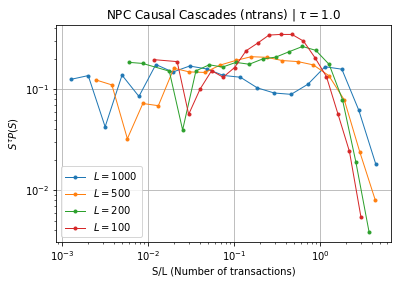

In [18]:
tau = 1.0

hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/1000,numpy.divide(hist[a],binsize[a])/len(npcnrows22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=1000$")

hist, bins = np.histogram(npcnrows500, bins=np.logspace(np.log10(min(npcnrows500)),np.log10(max(npcnrows500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/500,numpy.divide(hist[a],binsize[a])/len(npcnrows500)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L =500$")

hist, bins = np.histogram(npcnrows200, bins=np.logspace(np.log10(min(npcnrows200)),np.log10(max(npcnrows200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/200,numpy.divide(hist[a],binsize[a])/len(npcnrows200)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L = 200$")

hist, bins = np.histogram(npcnrows100, bins=np.logspace(np.log10(min(npcnrows100)),np.log10(max(npcnrows100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/100,numpy.divide(hist[a],binsize[a])/len(npcnrows100)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=100$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (ntrans) | $ \tau = $"+str(tau))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel('S/L (Number of transactions)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/ntrans_scaled2_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



## Volume

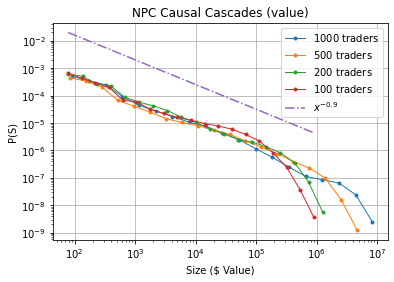

In [19]:
tau = 0.9

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes22),'o-', linewidth = 1, markersize = 3, label = "$1000$ traders")

hist, bins = np.histogram(npcsizes500, bins=np.logspace(np.log10(min(npcsizes500)),np.log10(max(npcsizes500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes500),'o-', linewidth = 1, markersize = 3, label = "$500$ traders")

hist, bins = np.histogram(npcsizes200, bins=np.logspace(np.log10(min(npcsizes200)),np.log10(max(npcsizes200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes200),'o-', linewidth = 1, markersize = 3, label = "$200$ traders")

hist, bins = np.histogram(npcsizes100, bins=np.logspace(np.log10(min(npcsizes100)),np.log10(max(npcsizes100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes100),'o-', linewidth = 1, markersize = 3, label = "$100$ traders")

plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (value)")
plt.ylabel('P(S)')
plt.xlabel('Size ($ Value)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/value_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



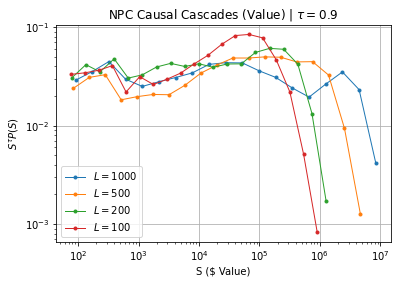

In [20]:
tau = 0.9

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=1000$")

hist, bins = np.histogram(npcsizes500, bins=np.logspace(np.log10(min(npcsizes500)),np.log10(max(npcsizes500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes500)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L =500$")

hist, bins = np.histogram(npcsizes200, bins=np.logspace(np.log10(min(npcsizes200)),np.log10(max(npcsizes200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes200)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L = 200$")

hist, bins = np.histogram(npcsizes100, bins=np.logspace(np.log10(min(npcsizes100)),np.log10(max(npcsizes100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes100)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=100$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (Value) | $ \tau = $"+str(tau))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel('S ($ Value)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/value_scaled_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



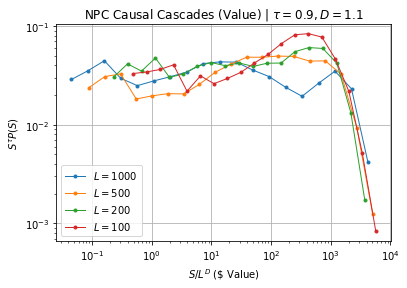

In [35]:
tau = 0.9
D = 1.1
hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/1000**D,numpy.divide(hist[a],binsize[a])/len(npcsizes22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=1000$")

hist, bins = np.histogram(npcsizes500, bins=np.logspace(np.log10(min(npcsizes500)),np.log10(max(npcsizes500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/500**D,numpy.divide(hist[a],binsize[a])/len(npcsizes500)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L =500$")

hist, bins = np.histogram(npcsizes200, bins=np.logspace(np.log10(min(npcsizes200)),np.log10(max(npcsizes200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/200**D,numpy.divide(hist[a],binsize[a])/len(npcsizes200)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L = 200$")

hist, bins = np.histogram(npcsizes100, bins=np.logspace(np.log10(min(npcsizes100)),np.log10(max(npcsizes100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/100**D,numpy.divide(hist[a],binsize[a])/len(npcsizes100)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=100$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (Value) | $ \tau = $"+str(tau)+'$, D = $'+str(D))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel(r'$S/L^{D}$ (\$ Value)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/value_scaled2_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



## Duration

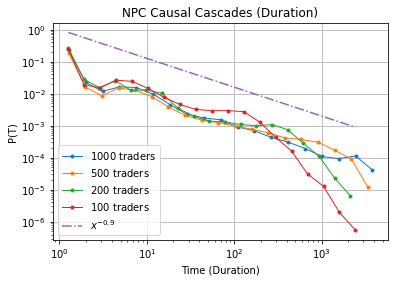

In [22]:
tau = 0.9

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration22),'o-', linewidth = 1, markersize = 3, label = "$1000$ traders")

hist, bins = np.histogram(npcduration500, bins=np.logspace(np.log10(min(npcduration500)),np.log10(max(npcduration500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration500),'o-', linewidth = 1, markersize = 3, label = "$500$ traders")

hist, bins = np.histogram(npcduration200, bins=np.logspace(np.log10(min(npcduration200)),np.log10(max(npcduration200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration200),'o-', linewidth = 1, markersize = 3, label = "$200$ traders")

hist, bins = np.histogram(npcduration100, bins=np.logspace(np.log10(min(npcduration100)),np.log10(max(npcduration100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration100),'o-', linewidth = 1, markersize = 3, label = "$100$ traders")

plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (Duration)")
plt.ylabel('P(T)')
plt.xlabel('Time (Duration)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/duration_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



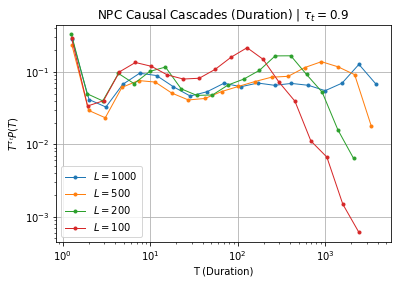

In [23]:
tau = 0.9

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=1000$")

hist, bins = np.histogram(npcduration500, bins=np.logspace(np.log10(min(npcduration500)),np.log10(max(npcduration500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration500)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L =500$")

hist, bins = np.histogram(npcduration200, bins=np.logspace(np.log10(min(npcduration200)),np.log10(max(npcduration200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration200)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L = 200$")

hist, bins = np.histogram(npcduration100, bins=np.logspace(np.log10(min(npcduration100)),np.log10(max(npcduration100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration100)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=100$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (Duration) | $ \tau_t = $"+str(tau))
plt.ylabel(r'$T^{\tau_t}P(T)$')
plt.xlabel('T (Duration)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/duration_scaled_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



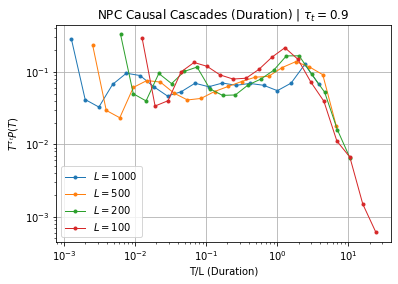

In [24]:
tau = 0.9

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/1000,numpy.divide(hist[a],binsize[a])/len(npcduration22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=1000$")

hist, bins = np.histogram(npcduration500, bins=np.logspace(np.log10(min(npcduration500)),np.log10(max(npcduration500)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/500,numpy.divide(hist[a],binsize[a])/len(npcduration500)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L =500$")

hist, bins = np.histogram(npcduration200, bins=np.logspace(np.log10(min(npcduration200)),np.log10(max(npcduration200)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/200,numpy.divide(hist[a],binsize[a])/len(npcduration200)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L = 200$")

hist, bins = np.histogram(npcduration100, bins=np.logspace(np.log10(min(npcduration100)),np.log10(max(npcduration100)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a]/100,numpy.divide(hist[a],binsize[a])/len(npcduration100)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$L=100$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (Duration) | $ \tau_t = $"+str(tau))
plt.ylabel(r'$T^{\tau_t}P(T)$')
plt.xlabel('T/L (Duration)')
plt.grid(True)
# plt.savefig("./forsiewann/march11/duration_scaled2_nTradersCompare_2-5stocks.png", dpi=250)
plt.show()
plt.close()



# S vs T

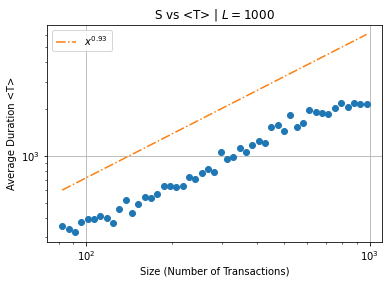

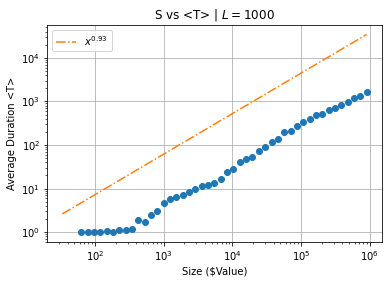

In [246]:
binedges = numpy.geomspace(8e1,1e3)

def binAv(sizes,roots,binedges):

    totalRoots,binE = numpy.histogram(sizes,binedges,weights=roots)

    sizeCounts,binE = numpy.histogram(sizes,binedges)

    totalRoots[sizeCounts>0]/=sizeCounts[sizeCounts>0] #let's not divide by zero. s

    return totalRoots 

binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcnrows22),np.asnumpy(npcduration22),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.93)*10, '-.', label = "$x^{0.93}$")
plt.xlabel("Size (Number of Transactions)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 1000$")
plt.legend()
plt.loglog()
plt.show()

###################
binedges = numpy.geomspace(3e1,1e6)

binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcsizes22),np.asnumpy(npcduration22),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.93)/10, '-.', label = "$x^{0.93}$")
plt.xlabel("Size ($Value)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 1000$")
plt.legend()
plt.loglog()
plt.show()

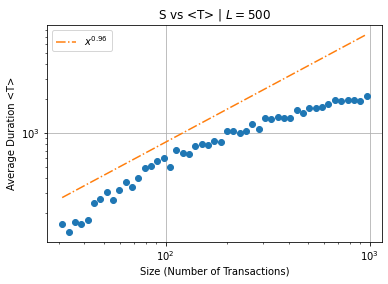

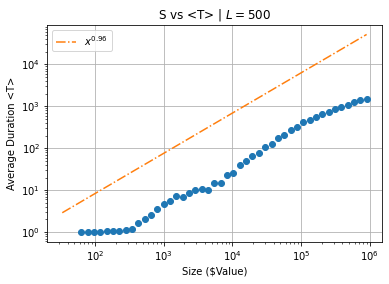

In [253]:
binedges = numpy.geomspace(3e1,1e3)


binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcnrows500),np.asnumpy(npcduration500),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.96)*10, '-.', label = "$x^{0.96}$")
plt.xlabel("Size (Number of Transactions)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 500$")
plt.legend()
plt.loglog()
plt.show()

###################
binedges = numpy.geomspace(3e1,1e6)

binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcsizes500),np.asnumpy(npcduration500),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.96)/10, '-.', label = "$x^{0.96}$")
plt.xlabel("Size ($Value)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 500$")
plt.legend()
plt.loglog()
plt.show()

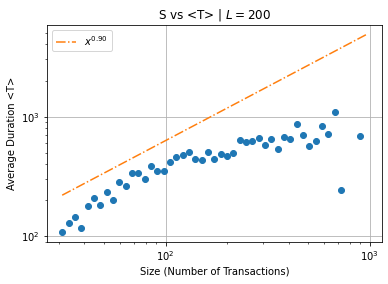

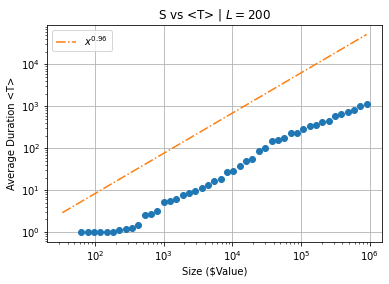

In [254]:
binedges = numpy.geomspace(3e1,1e3)

binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcnrows200),np.asnumpy(npcduration200),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.90)*10, '-.', label = "$x^{0.90}$")
plt.xlabel("Size (Number of Transactions)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 200$")
plt.legend()
plt.loglog()
plt.show()

###################
binedges = numpy.geomspace(3e1,1e6)

binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcsizes200),np.asnumpy(npcduration200),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.96)/10, '-.', label = "$x^{0.96}$")
plt.xlabel("Size ($Value)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 200$")
plt.legend()
plt.loglog()
plt.show()

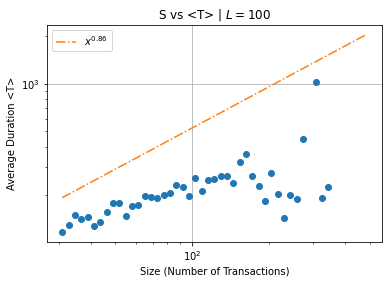

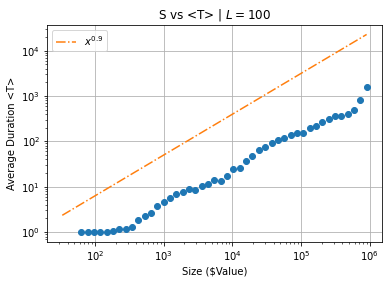

In [260]:
binedges = numpy.geomspace(3e1,5e2)

def binAv(sizes,roots,binedges):

    totalRoots,binE = numpy.histogram(sizes,binedges,weights=roots)

    sizeCounts,binE = numpy.histogram(sizes,binedges)

    totalRoots[sizeCounts>0]/=sizeCounts[sizeCounts>0] #let's not divide by zero. s

    return totalRoots 

binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcnrows100),np.asnumpy(npcduration100),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.86)*10, '-.', label = "$x^{0.86}$")
plt.xlabel("Size (Number of Transactions)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 100$")
plt.legend()
plt.loglog()
plt.show()

###################
binedges = numpy.geomspace(3e1,1e6)

binCenters = (binedges[1:]*binedges[:-1])**.5

rootAv = binAv(np.asnumpy(npcsizes100),np.asnumpy(npcduration100),binedges)

plt.plot(binCenters,rootAv, 'o')
plt.plot(binCenters,numpy.power(binCenters,0.9)/10, '-.', label = "$x^{0.9}$")
plt.xlabel("Size ($Value)")
plt.ylabel("Average Duration <T>")
plt.grid(True)
plt.title("S vs <T> | $L = 100$")
plt.legend()
plt.loglog()
plt.show()

# Hurst Indices

Check individual stock cascdaes instead

In [125]:
hursts = []
ntrans = []
values = []
durs = []
for i in range(0,2000):
    stocks = np.asarray((cc22[i]['stock']))
    hurst = 0
    value = 0
    for stock in stocks:
        hurst+=(hurstPoolNPC[stock][0])

    durs.append(1+cc22[i]['time'].max()-cc22[i]['time'].min())
    ntrans.append(len(cc22[i]))
    hursts.append(float(hurst/len(stocks)))

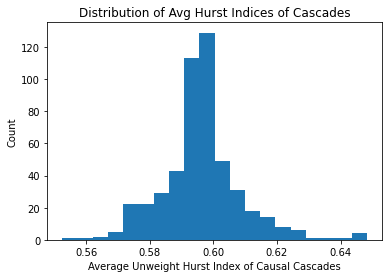

In [100]:
plt.hist(hursts, bins=20)
plt.xlabel("Average Unweight Hurst Index of Causal Cascades")
plt.ylabel("Count")
plt.title("Distribution of Avg Hurst Indices of Cascades")
plt.savefig("./forsiewann/march11/avghurstdistribution.png", dpi=200)

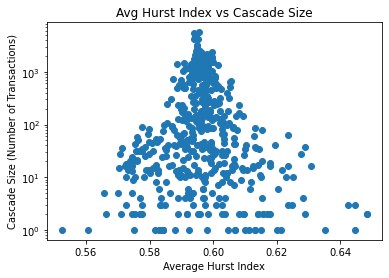

In [101]:
plt.scatter(hursts, ntrans)
plt.yscale("log")
plt.xlabel("Average Hurst Index")
plt.ylabel("Cascade Size (Number of Transactions)")
plt.title("Avg Hurst Index vs Cascade Size")
plt.savefig("./forsiewann/march11/avghurst_cascadesize.png", dpi=200)

# 7-9 vs 2-4 1000 and 500 traders

In [14]:
p = 'npc_1000_5000_100_2_5.pkl'

with open('/home/braedyn/Documents/causalCascades/2-4/causalCascades22_' + p, 'rb') as handle:
    cc24o1000t = pickle.load(handle)
    
p = 'npc_501_5000_100_2_5.pkl'

with open('/home/braedyn/Documents/causalCascades/2-4/causalCascades22_' + p, 'rb') as handle:
    cc24o500t = pickle.load(handle)

In [15]:
sizes24o500t, nrows24o500t, npcduration24o500t = cascadeAnalyzerGPU(cc24o500t, stockPoolNPC, t0=993, tf=5992)
sizes24o1000t, nrows24o1000t, npcduration24o1000t = cascadeAnalyzerGPU(cc24o1000t, stockPoolNPC, t0=993, tf=5992)

# stock and portf cascades

In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_"+p[4:-4]+".csv")
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_501_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/2-4/hurstPool_501_5000_100_2_5.npy")
with open('./results/nopricechange/7-9/traderIDs_'+p[4:], 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [7]:
import numpy as np
import pandas as pd

def findStockOrderCascades(stockOrders, cascades, minSep = 2):
    """
    inpurt filtered stockOrders table
    works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
    returns all cascades
    FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
    """
    if len(stockOrders) > 0 :
        #Find seperations in trading times
        ToS = stockOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>minSep)[0]
        i0 = 0

        if len(cascades) > 0:
            n = max(cascades.keys())
        else:
            # first cascade
            n = 0

        if len(keySep)>0:
            for key in keySep:
                key += 1
                stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
                stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
                cascades[n] = stockCascade
                i0 = key
                n += 1
                
    #cascades is a dictionary
    return cascades

def findPortfOrderCascades(portfOrders, cascades, minSep = 2):
    """
    input filtered portfOrder table
    works on portfOrder tables from TtotalOrders, returns panda tables of each cascade
    returns all cascades
    FOR LOOKING AT INDIVIDUAL PORTF CASCADES NOV14
    """

    if len(portfOrders) > 0:
        #Find seperations in trading times
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>minSep)[0]
        i0 = 0

        if len(cascades) > 0:
            n = max(cascades.keys())
        else:
            # first cascade
            n = 0

        if len(keySep)>0:
            for key in keySep:
                key += 1 # indexing
                portfCascade = portfOrders[portfOrders['time']<=ToS[key]]
                portfCascade = portfCascade[portfCascade['time']>=ToS[i0]]
                cascades[n] = portfCascade
                i0 = key
                n += 1
                
    #cascades is a dictionary
    return cascades

def cascadeAnalyzer(cascades, stockPool, t0, tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = int(casc.iloc[row]['time'])
                stock = int(casc.iloc[row]['stock'])
                volume = int(casc.iloc[row]['order'])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.append(duration, dur)
            sizes = np.append(sizes, size)
            nrows = np.append(nrows, len(casc))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
    """
    analysis for stock order cascades seen in draft 8.#
    ALL IN ONE
    """
    cascades = {}
    stockKeys = [] #index of each stock's cascades
    for stock in range(len(stockPool)):
        stockKeys.append(len(cascades))
        cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)
        
    sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

    return sizes, nrows, duration , cascades, stockKeys

def portfOrderCascadeAnalyzer(Ttotalorders, stockPool, traderIDs, t0, tf, minSep ):    
    """
    analysis for stock order cascades seen in draft 8.#
    ALL IN ONE
    """
    cascades = {}
    portfKeys = []
    for portf in list(traderIDs.keys()):
        portfKeys.append(len(cascades))
        cascades = findPortfOrderCascades(Ttotalorders[Ttotalorders['portfolio']==portf], cascades = cascades, minSep = minSep)

    sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

    return sizes, nrows, duration , cascades, portfKeys



In [8]:
pSizes10, pNrows10, pDuration10, pCascades10, pPortfKeys10 = portfOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, traderIDsNPC, 992,5992,10)
pSizes5, pNrows5, pDuration5, pCascades5, pPortfKeys5 = portfOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, traderIDsNPC, 992,5992,5)
pSizes2, pNrows2, pDuration2, pCascades2, pPortfKeys2 = portfOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, traderIDsNPC, 992,5992,2)
pSizes1, pNrows1, pDuration1, pCascades1, pPortfKeys1 = portfOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, traderIDsNPC, 992,5992,1)

In [9]:
sSizes10, sNrows10, sDuration10, sCascades10, sPortfKeys10 = stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 992,5992,10)
sSizes5, sNrows5, sDuration5, sCascades5, sPortfKeys5 = stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 992,5992,5)
sSizes2, sNrows2, sDuration2, sCascades2, sPortfKeys2 = stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 992,5992,2)
sSizes1, sNrows1, sDuration1, sCascades1, sPortfKeys1 = stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 992,5992,1)

# plot stock cascades

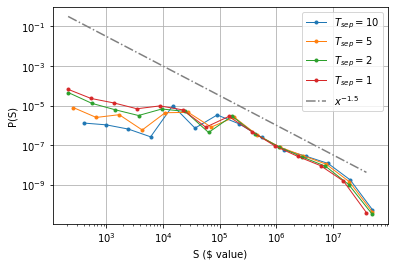

In [15]:
hist, bins = np.histogram(sSizes10, bins=np.logspace(np.log10(min(sSizes10)),np.log10(max(sSizes10)),15))
binsize = np.diff(bins)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sSizes10),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=10$")

hist, bins = np.histogram(sSizes5, bins=np.logspace(np.log10(min(sSizes5)),np.log10(max(sSizes5)),15))
binsize = np.diff(bins)


mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sSizes5),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=5$")

hist, bins = np.histogram(sSizes2, bins=np.logspace(np.log10(min(sSizes2)),np.log10(max(sSizes2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sSizes2),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=2$")

hist, bins = np.histogram(sSizes1, bins=np.logspace(np.log10(min(sSizes1)),np.log10(max(sSizes1)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sSizes1),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=1$")

tau = -1.5
plt.plot(mid[a], np.power(mid[a], tau)*1000, '-.', color = 'grey', label="$x^{"+str(tau)+"}$")

plt.loglog()
plt.legend()
plt.grid(True)
plt.xlabel("S ($ value)")
plt.ylabel("P(S)")
plt.savefig("./forsiewann/march11/stockCascs_value_"+p[:-4]+".png", dpi=250)

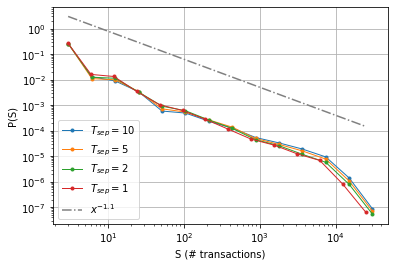

In [19]:
hist, bins = np.histogram(sNrows10, bins=np.logspace(np.log10(min(sNrows10)),np.log10(max(sNrows10)),15))
binsize = np.diff(bins)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sNrows10),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=10$")

hist, bins = np.histogram(sNrows5, bins=np.logspace(np.log10(min(sNrows5)),np.log10(max(sNrows5)),15))
binsize = np.diff(bins)


mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sNrows5),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=5$")

hist, bins = np.histogram(sNrows2, bins=np.logspace(np.log10(min(sNrows2)),np.log10(max(sNrows2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sNrows2),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=2$")

hist, bins = np.histogram(sNrows1, bins=np.logspace(np.log10(min(sNrows1)),np.log10(max(sNrows1)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sNrows1),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=1$")

tau = -1.1
plt.plot(mid[a], np.power(mid[a], tau)*10, '-.', color = 'grey', label="$x^{"+str(tau)+"}$")

plt.loglog()
plt.legend()
plt.grid(True)
plt.xlabel("S (# transactions)")
plt.ylabel("P(S)")
plt.savefig("./forsiewann/march11/stockCascs_nrows_"+p[:-4]+".png", dpi=250)

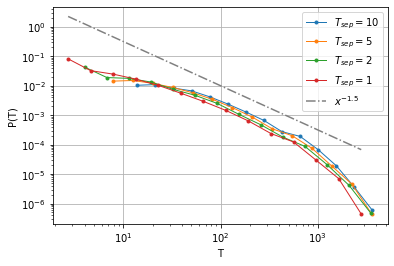

In [20]:
hist, bins = np.histogram(sDuration10, bins=np.logspace(np.log10(min(sDuration10)),np.log10(max(sDuration10)),15))
binsize = np.diff(bins)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sDuration10),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=10$")

hist, bins = np.histogram(sDuration5, bins=np.logspace(np.log10(min(sDuration5)),np.log10(max(sDuration5)),15))
binsize = np.diff(bins)


mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sDuration5),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=5$")

hist, bins = np.histogram(sDuration2, bins=np.logspace(np.log10(min(sDuration2)),np.log10(max(sDuration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sDuration2),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=2$")

hist, bins = np.histogram(sDuration1, bins=np.logspace(np.log10(min(sDuration1)),np.log10(max(sDuration1)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(sDuration1),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=1$")

tau = -1.5
plt.plot(mid[a], np.power(mid[a], tau)*10, '-.', color = 'grey', label="$x^{"+str(tau)+"}$")

plt.loglog()
plt.legend()
plt.grid(True)
plt.xlabel("T")
plt.ylabel("P(T)")
plt.savefig("./forsiewann/march11/stockCascs_duration_"+p[:-4]+".png", dpi=250)

# plot portf cascades

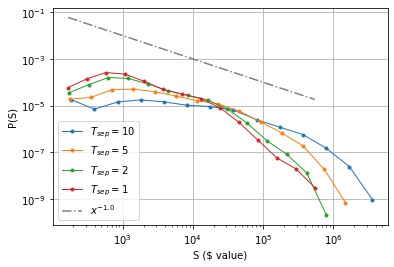

In [21]:
hist, bins = np.histogram(pSizes10, bins=np.logspace(np.log10(min(pSizes10)),np.log10(max(pSizes10)),15))
binsize = np.diff(bins)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pSizes10),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=10$")

hist, bins = np.histogram(pSizes5, bins=np.logspace(np.log10(min(pSizes5)),np.log10(max(pSizes5)),15))
binsize = np.diff(bins)


mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pSizes5),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=5$")

hist, bins = np.histogram(pSizes2, bins=np.logspace(np.log10(min(pSizes2)),np.log10(max(pSizes2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pSizes2),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=2$")

hist, bins = np.histogram(pSizes1, bins=np.logspace(np.log10(min(pSizes1)),np.log10(max(pSizes1)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pSizes1),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=1$")

tau = -1.
plt.plot(mid[a], np.power(mid[a], tau)*10, '-.', color = 'grey', label="$x^{"+str(tau)+"}$")

plt.loglog()
plt.legend()
plt.grid(True)
plt.xlabel("S ($ value)")
plt.ylabel("P(S)")
plt.savefig("./forsiewann/march11/portfCascs_value_"+p[:-4]+".png", dpi=250)

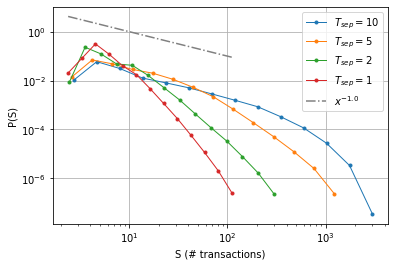

In [22]:
hist, bins = np.histogram(pNrows10, bins=np.logspace(np.log10(min(pNrows10)),np.log10(max(pNrows10)),15))
binsize = np.diff(bins)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pNrows10),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=10$")

hist, bins = np.histogram(pNrows5, bins=np.logspace(np.log10(min(pNrows5)),np.log10(max(pNrows5)),15))
binsize = np.diff(bins)


mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pNrows5),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=5$")

hist, bins = np.histogram(pNrows2, bins=np.logspace(np.log10(min(pNrows2)),np.log10(max(pNrows2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pNrows2),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=2$")

hist, bins = np.histogram(pNrows1, bins=np.logspace(np.log10(min(pNrows1)),np.log10(max(pNrows1)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pNrows1),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=1$")

tau = -1.
plt.plot(mid[a], np.power(mid[a], tau)*10, '-.', color = 'grey', label="$x^{"+str(tau)+"}$")

plt.loglog()
plt.legend()
plt.grid(True)
plt.xlabel("S (# transactions)")
plt.ylabel("P(S)")
plt.savefig("./forsiewann/march11/portfCascs_nrows_"+p[:-4]+".png", dpi=250)

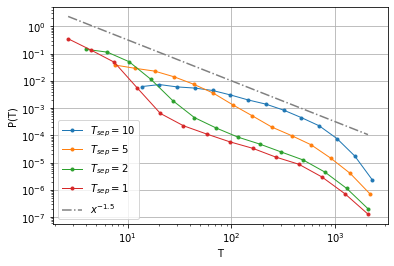

In [23]:
hist, bins = np.histogram(pDuration10, bins=np.logspace(np.log10(min(pDuration10)),np.log10(max(pDuration10)),15))
binsize = np.diff(bins)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pDuration10),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=10$")

hist, bins = np.histogram(pDuration5, bins=np.logspace(np.log10(min(pDuration5)),np.log10(max(pDuration5)),15))
binsize = np.diff(bins)


mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pDuration5),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=5$")

hist, bins = np.histogram(pDuration2, bins=np.logspace(np.log10(min(pDuration2)),np.log10(max(pDuration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pDuration2),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=2$")

hist, bins = np.histogram(pDuration1, bins=np.logspace(np.log10(min(pDuration1)),np.log10(max(pDuration1)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
a = np.nonzero(hist)[0]
plt.plot(mid[a],np.divide(hist[a],binsize[a])/len(pDuration1),'o-', linewidth = 1, markersize = 3, label = "$T_{sep}=1$")

tau = -1.5
plt.plot(mid[a], np.power(mid[a], tau)*10, '-.', color = 'grey', label="$x^{"+str(tau)+"}$")

plt.loglog()
plt.legend()
plt.grid(True)
plt.xlabel("T")
plt.ylabel("P(T)")
plt.savefig("./forsiewann/march11/portfCascs_duration_"+p[:-4]+".png", dpi=250)

In [24]:
len(traderIDsNPC.keys())

1000